In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
test = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")
test.shape

(90954, 13)

In [3]:
data.shape

(136429, 14)

In [4]:
data.isnull().any()

id                         False
Product ID                 False
Type                       False
Air temperature [K]        False
Process temperature [K]    False
Rotational speed [rpm]     False
Torque [Nm]                False
Tool wear [min]            False
Machine failure            False
TWF                        False
HDF                        False
PWF                        False
OSF                        False
RNF                        False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
def plotBarGraph(res, column_name, start=0, top=10, show=False, rotate=False):
    plt.figure(figsize=(15, 6))
    plt.bar(res[column_name][start:top], res['count'][start:top])
    plt.xlabel(column_name, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title(f'{column_name} Frequency', fontsize=16)

    for i, value in enumerate(res['count'][start:top]):
        plt.text(res[column_name][start + i], value + 0.5, str(value), ha='center', fontsize=16)
        
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    if rotate:
        plt.xticks(rotation=90)

    if show:
        plt.savefig(f'{column_name}_freq.png')
        plt.show()
    else:
        plt.show()

In [7]:
def plotPieChart(res, column_name, start=0, top=10, show=False, ax=None, fig=None):
    labels = res[column_name][start:top]
    values = res['count'][start:top]
    
    if ax:
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
        ax.set_title(f'{column_name} Frequency', fontsize=16)
    else:
        if not fig:
            plt.figure(figsize=(8, 15))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

        plt.title(f'{column_name} Frequency', fontsize=16)

        if show:
            plt.savefig(f'{column_name}_freq_pie_chart.png')
            plt.show()
        else:
            plt.show()

# EDA

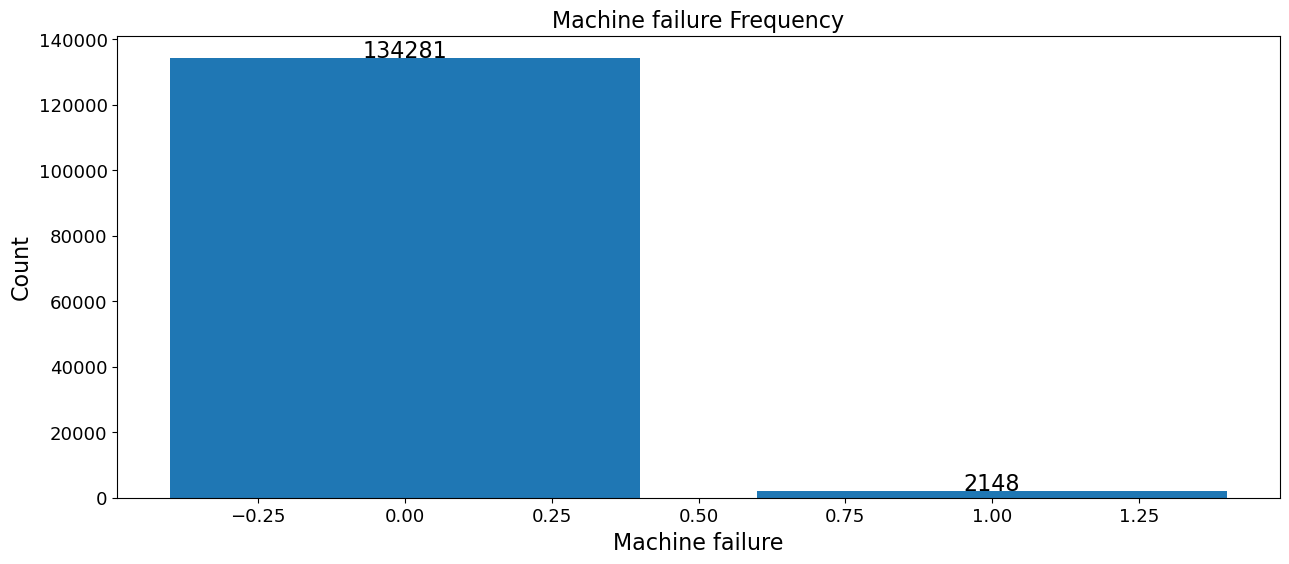

In [8]:
plotBarGraph(data['Machine failure'].value_counts().reset_index().rename(columns = {'index' : 'Machine failure', 'Machine failure' : 'count'}),column_name='Machine failure')

# Above graph shows that data is highly imbalanced

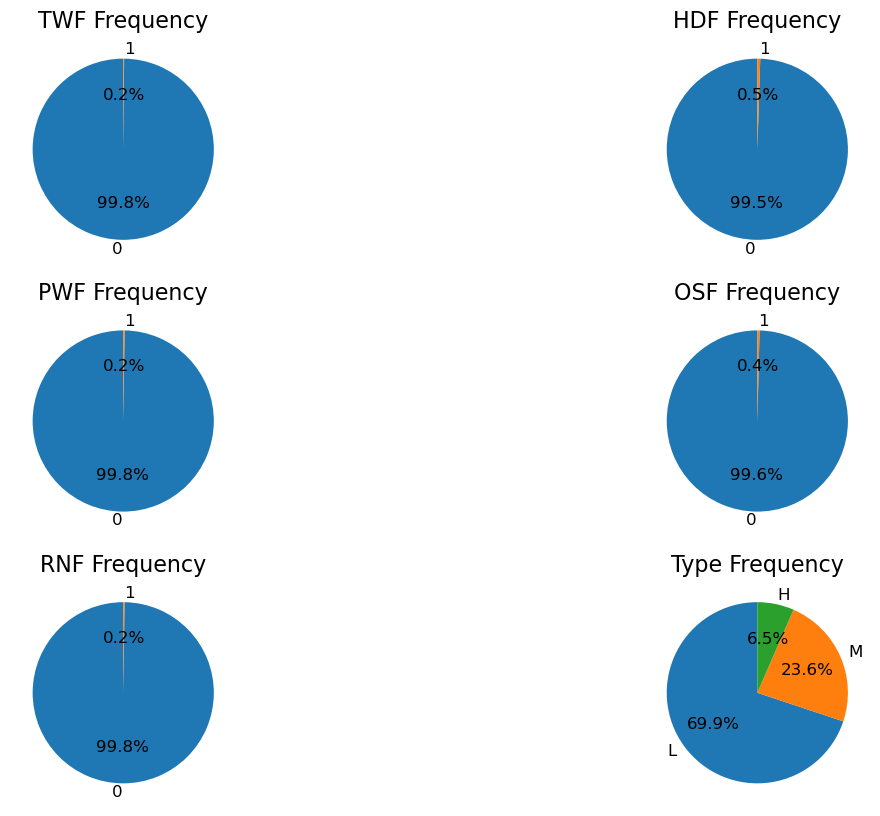

In [9]:
_, ax = plt.subplots(3,2, figsize=(15,10))
plotPieChart(data['TWF'].value_counts().reset_index().rename(columns = {'index' : 'TWF', 'TWF' : 'count'}),column_name='TWF', ax=ax[0,0])
plotPieChart(data['HDF'].value_counts().reset_index().rename(columns = {'index' : 'HDF', 'HDF' : 'count'}),column_name='HDF', ax=ax[0,1])
plotPieChart(data['PWF'].value_counts().reset_index().rename(columns = {'index' : 'PWF', 'PWF' : 'count'}),column_name='PWF', ax=ax[1,0])
plotPieChart(data['OSF'].value_counts().reset_index().rename(columns = {'index' : 'OSF', 'OSF' : 'count'}),column_name='OSF', ax=ax[1,1])
plotPieChart(data['RNF'].value_counts().reset_index().rename(columns = {'index' : 'RNF', 'RNF' : 'count'}),column_name='RNF', ax=ax[2,0])
plotPieChart(data['Type'].value_counts().reset_index().rename(columns = {'index' : 'Type', 'Type' : 'count'}),column_name='Type', ax=ax[2,1])

# Check the impact of categorical varibales on machne failure

<Axes: xlabel='Machine failure', ylabel='Type'>

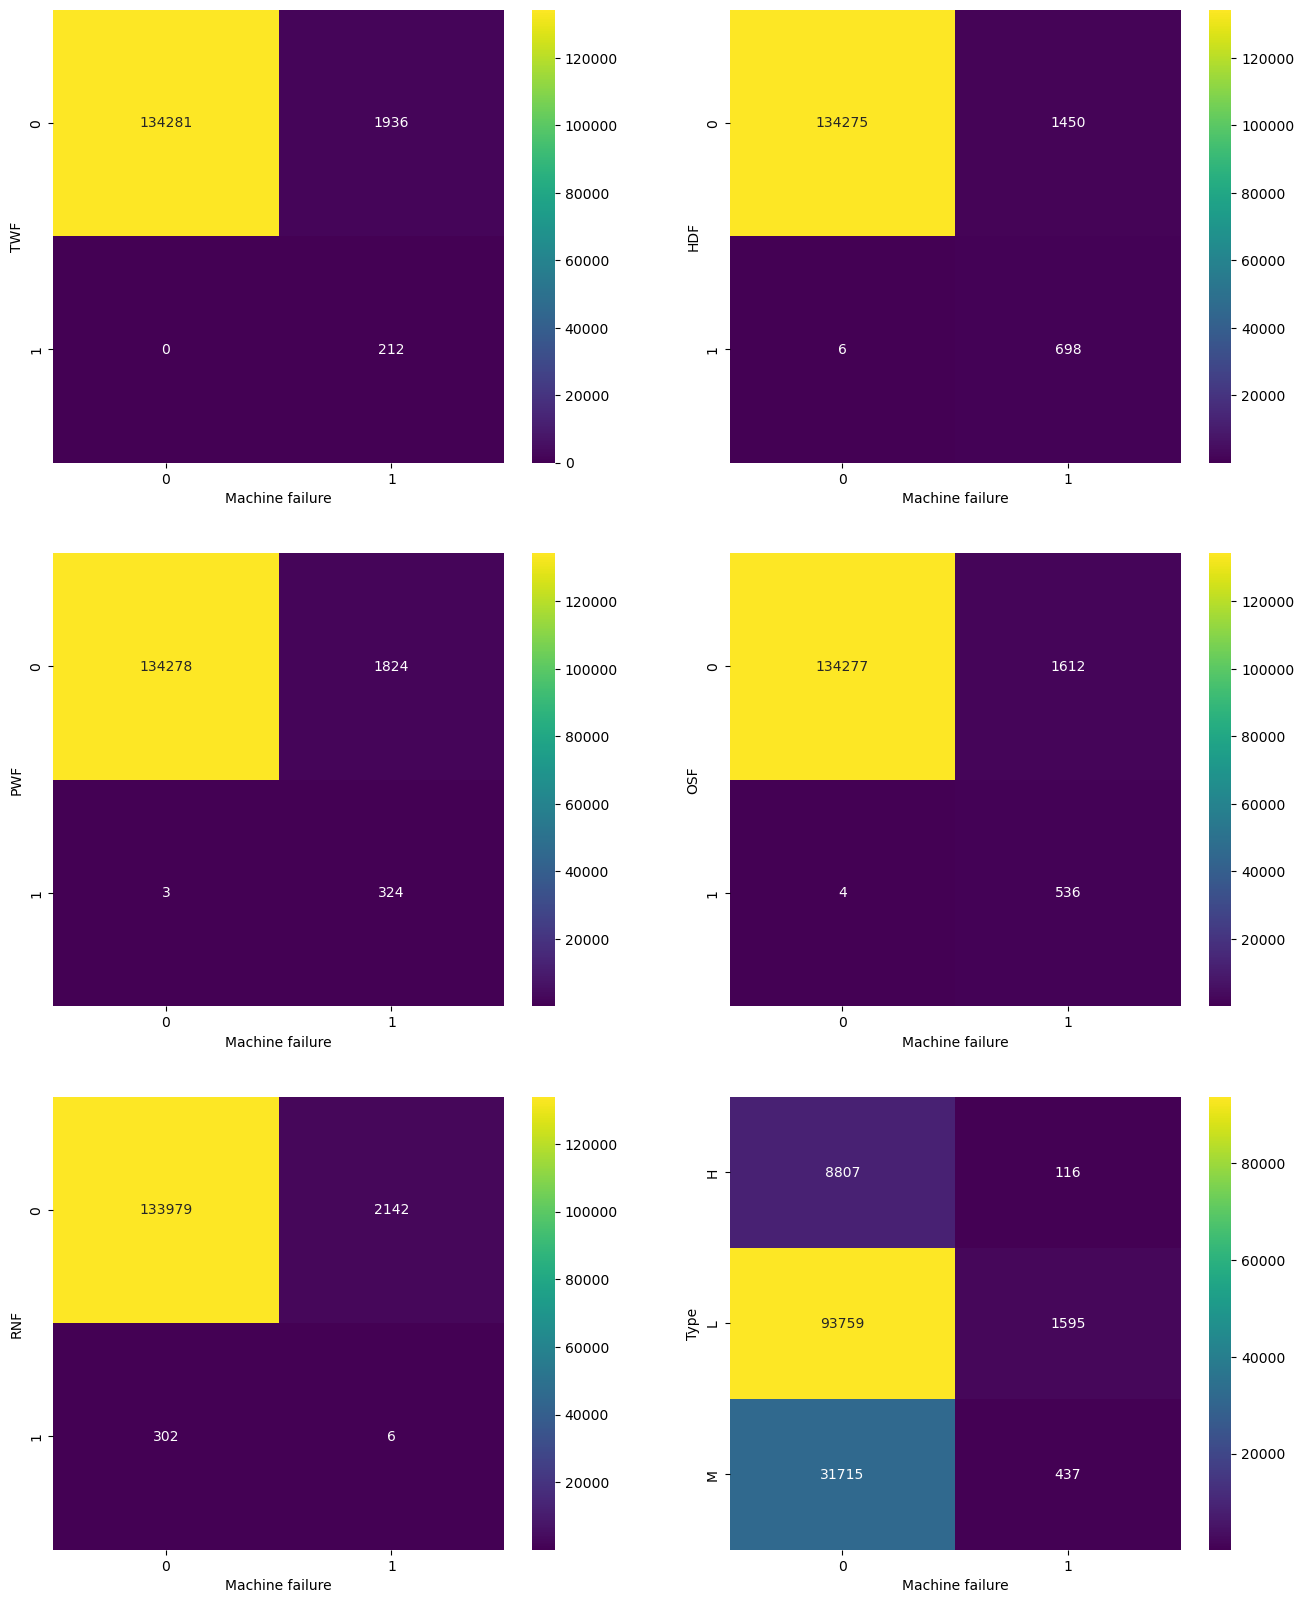

In [10]:
_, ax = plt.subplots(3,2, figsize=(16,20))
res = data[['TWF','Machine failure']].groupby(['TWF','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='TWF', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
#sns.heatmap(data=res, annot=True,fmt=".0f", ax=ax[0,0], cmap='viridis')
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[0,0], cmap='viridis')

res = data[['HDF','Machine failure']].groupby(['HDF','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='HDF', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
#sns.heatmap(data=res, annot=True,fmt=".0f", ax=ax[0,1], cmap='viridis')
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[0,1], cmap='viridis')

res = data[['PWF','Machine failure']].groupby(['PWF','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='PWF', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
#sns.heatmap(data=res, annot=True,fmt=".0f", ax=ax[1,0], cmap='viridis')
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[1,0], cmap='viridis')

res = data[['OSF','Machine failure']].groupby(['OSF','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='OSF', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
#sns.heatmap(data=res, annot=True,fmt=".0f", ax=ax[1,1], cmap='viridis')
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[1,1], cmap='viridis')

res = data[['RNF','Machine failure']].groupby(['RNF','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='RNF', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
#sns.heatmap(data=res, annot=True,fmt=".0f", ax=ax[2,0], cmap='viridis')
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[2,0], cmap='viridis')

res = data[['Type','Machine failure']].groupby(['Type','Machine failure']).size().reset_index(name='count')
pivot_table = res.pivot_table(index='Type', columns='Machine failure', values='count', aggfunc='mean').fillna(0)
sns.heatmap(data=pivot_table, annot=True,fmt=".0f", ax=ax[2,1], cmap='viridis')

# Check the distibution of numeric varibales on machine failures

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

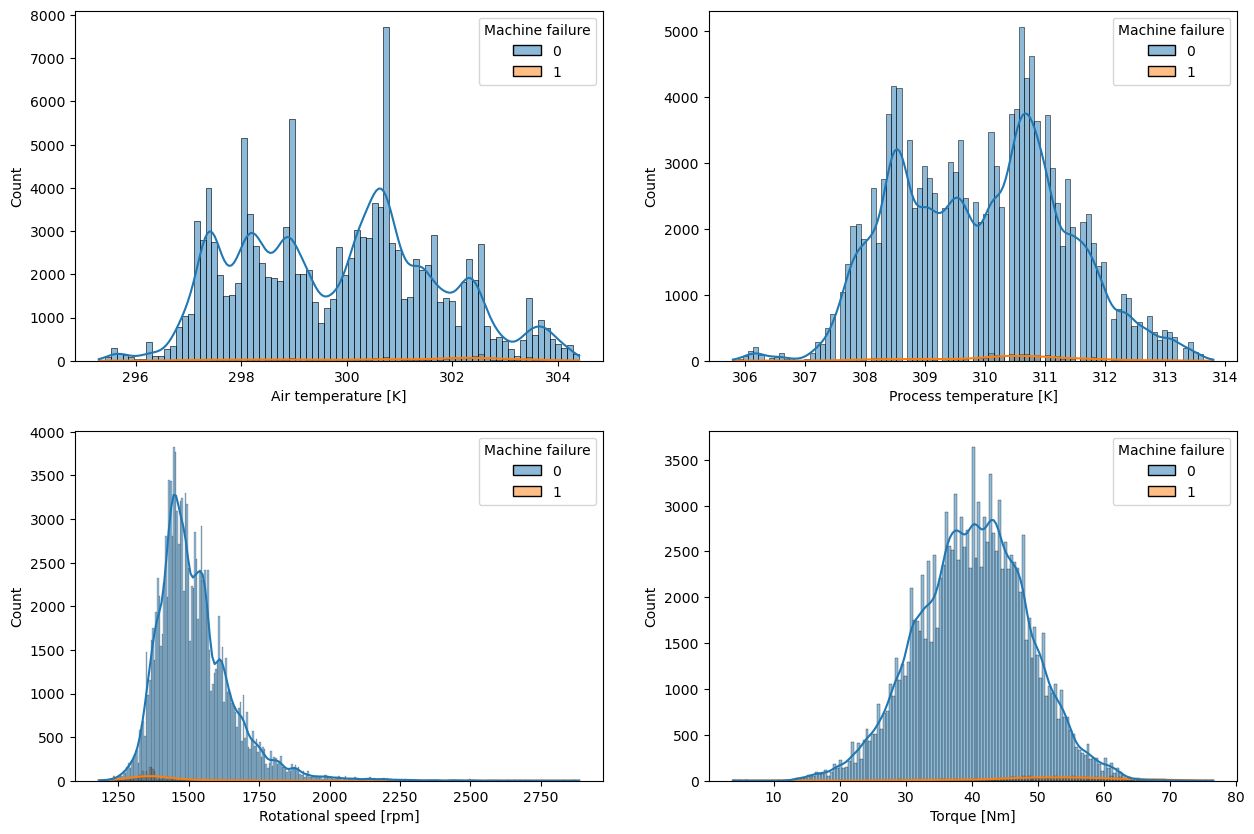

In [11]:
_, ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(data, x="Air temperature [K]", hue='Machine failure',kde=True, ax=ax[0,0])
sns.histplot(data, x="Process temperature [K]", hue='Machine failure',kde=True, ax=ax[0,1])
sns.histplot(data, x="Rotational speed [rpm]", hue='Machine failure',kde=True, ax=ax[1,0])
sns.histplot(data, x="Torque [Nm]", hue='Machine failure',kde=True, ax=ax[1,1])

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

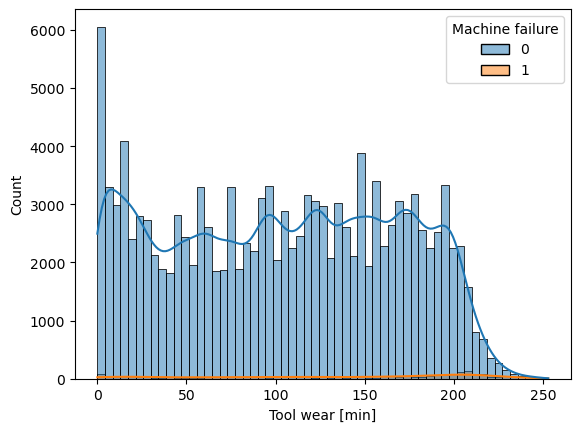

In [12]:
sns.histplot(data, x="Tool wear [min]", hue='Machine failure',kde=True)

# Lets check the impact of all these numeric column on Machine failure

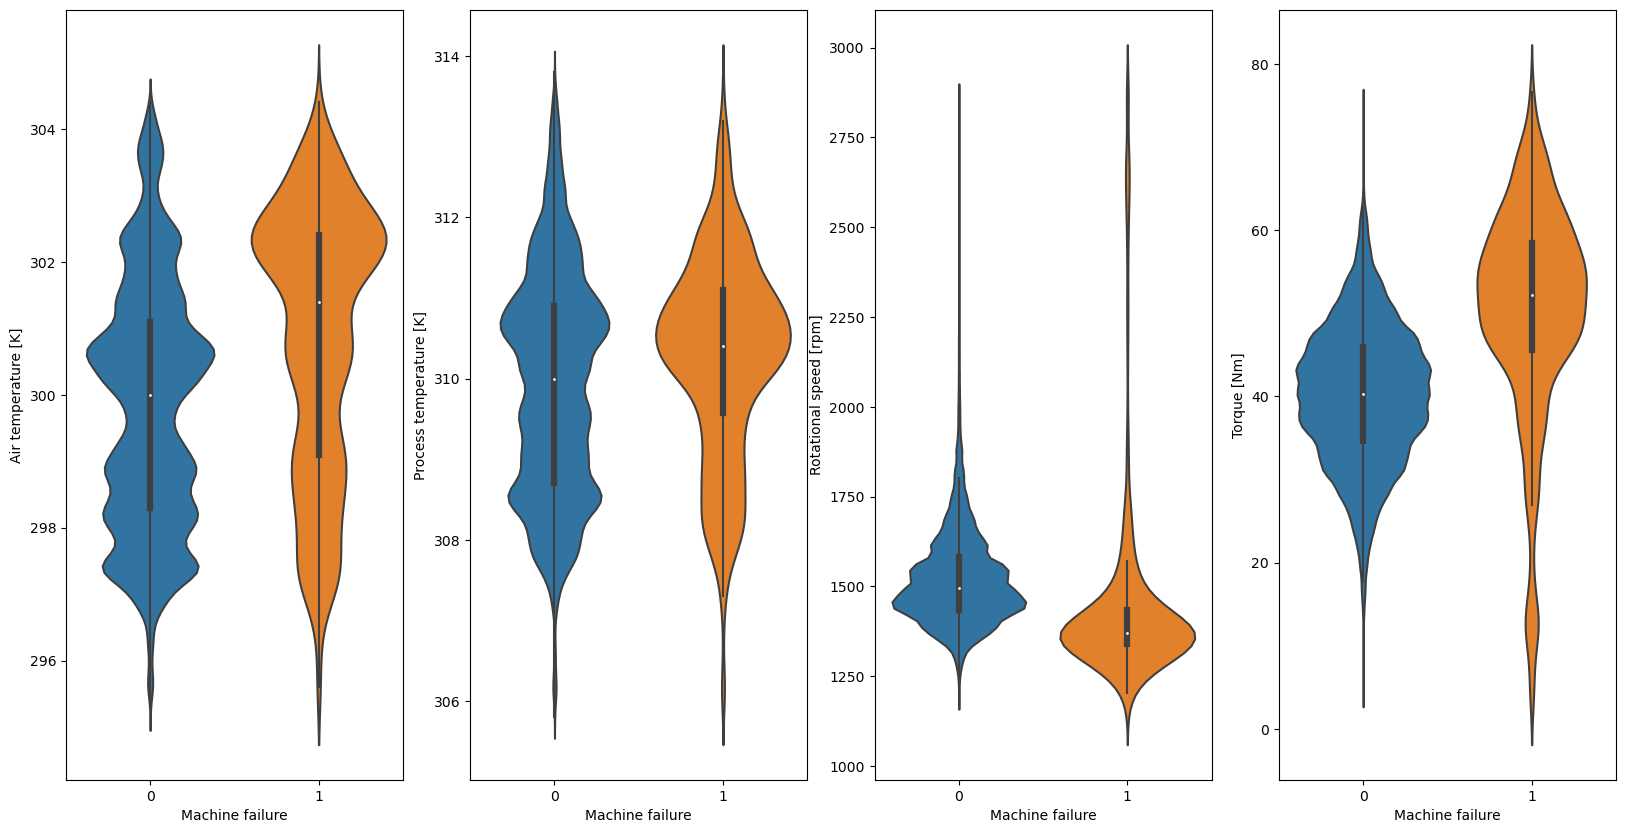

In [13]:
cols = ["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]"]
fig, ax = plt.subplots(1,4,figsize=(20,10))
for i,axe in zip(range(4),ax.flatten()):
    sns.violinplot(y = cols[i],x='Machine failure',data = data, ax=axe)
plt.show()

# Data Preprocessing

In [14]:
from imblearn.over_sampling import RandomOverSampler
def over_sample(X_train,y_train):
    ros = RandomOverSampler(random_state=42)
    X_ros, y_ros = ros.fit_resample(max_min(X_train), y_train)
    return X_ros, y_ros

In [16]:
le = LabelEncoder()
scaler = MinMaxScaler()
def clean_data(data, train_flag=False):
    #num_cols = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
    
    num_cols = list(data.dtypes[(data.dtypes!='object') & (data.dtypes.index != 'id') & (data.dtypes.index != 'Type')].index)
    categorical_cols = ['Type']
    
    
    if train_flag:
        # Instantiate and fit LabelEncoder
        le.fit(data[categorical_cols])
        # fit Normalization
        scaler.fit(data[num_cols])
        
   
    data[categorical_cols] = data[categorical_cols].apply(le.transform)
        
    data[num_cols] = scaler.transform(data[num_cols])
    
    
    
    data['Air temperature'] = data['Air temperature [K]']
    data['Process temperature'] = data['Process temperature [K]']
    data['Rotational speed'] = data['Rotational speed [rpm]']
    data['Torque'] = data['Torque [Nm]']
    data['Tool wear'] = data['Tool wear [min]']
    
    # Identify categorical columns 
    
    data = data.drop(['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]', 'Tool wear [min]'], axis=1)
    
    return data
    

In [20]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
data = clean_data(data, train_flag=True)
data.head(2)

,id,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,0,L50096,1,0.0,0.0,0.0,0.0,0.0,0.0,0.582418,0.4750,0.243402,0.443681,0.553360
1,1,M20343,2,0.0,0.0,0.0,0.0,0.0,0.0,0.802198,0.7875,0.339003,0.347527,0.790514


# Faeture Engineering

In [21]:
machine = pd.DataFrame()
machine['machine_failure'] = data[['Product ID','Machine failure']].groupby('Product ID').sum()
machine['machine_mentions'] = data[['Product ID','Machine failure']].groupby('Product ID').size()
machine['failure_ratio'] = machine['machine_failure'] / machine['machine_mentions']
machine = machine.drop(['machine_failure','machine_mentions'],axis=1).reset_index()
machine.head(10)

,Product ID,failure_ratio
0,H29424,0.000
1,H29425,0.000
2,H29432,0.000
3,H29434,0.000
4,H29441,0.000
5,H29452,0.125
6,H29457,0.000
7,H29462,0.000
8,H29466,0.000
9,H29481,0.000


In [22]:
col =['Product ID','Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']
res1 = data[col].groupby('Product ID').mean().reset_index().rename(columns= {'Air temperature': 'AVG Air temperature', 
                                                                   'Process temperature': 'AVG Process temperature', 
                                                                   'Rotational speed':'AVG Rotational speed', 
                                                                   'Torque':'AVG Torque', 
                                                                   'Tool wear': 'AVG Tool wear'})

res2 = data[col].groupby('Product ID').min().reset_index().rename(columns= {'Air temperature': 'MIN Air temperature', 
                                                                   'Process temperature': 'MIN Process temperature', 
                                                                   'Rotational speed':'MIN Rotational speed', 
                                                                   'Torque':'MIN Torque', 
                                                                   'Tool wear': 'MIN Tool wear'})

res3 = data[col].groupby('Product ID').max().reset_index().rename(columns= {'Air temperature': 'MAX Air temperature', 
                                                                   'Process temperature': 'MAX Process temperature', 
                                                                   'Rotational speed':'MAX Rotational speed', 
                                                                   'Torque':'MAX Torque', 
                                                                   'Tool wear': 'MAX Tool wear'})


#res2 = data[['Product ID','Machine failure']].groupby('Product ID').sum().reset_index().rename(columns={'Machine failure': 'AVG Machine failure'})
# final_res = res1.merge(res2,on='Product ID')

final_res = pd.concat([res1,res2.drop(['Product ID'],axis=1),res3.drop(['Product ID'],axis=1),machine.drop(['Product ID'],axis=1)], axis=1)
final_res.head(2)

,Product ID,AVG Air temperature,AVG Process temperature,AVG Rotational speed,AVG Torque,AVG Tool wear,MIN Air temperature,MIN Process temperature,MIN Rotational speed,MIN Torque,MIN Tool wear,MAX Air temperature,MAX Process temperature,MAX Rotational speed,MAX Torque,MAX Tool wear,failure_ratio
0,H29424,0.395604,0.412500,0.179472,0.449176,0.138340,0.395604,0.4125,0.179472,0.449176,0.138340,0.395604,0.4125,0.179472,0.449176,0.138340,0.0
1,H29425,0.376374,0.396875,0.154839,0.566277,0.105731,0.362637,0.3250,0.135484,0.423077,0.063241,0.395604,0.4250,0.200000,0.780220,0.130435,0.0


In [23]:
def get_data_frame_with_engineered_column(data):
    res = data.merge(final_res, on='Product ID', how="left")
    res = res.drop(['Product ID'], axis=1)
    return res.fillna(0)

# Model Building

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report,roc_auc_score

# Load data

def get_train_test_split(data, product_needed_flag=False):
    df = data.copy()
    # Split data into features and target
    X = df.drop(['id','Machine failure'], axis=1) 
    y = df['Machine failure']
    # Split data into train and test sets
    if not product_needed_flag:
        X = X.drop(['Product ID'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [31]:
def result(y_test,y_pred,y_score,model_name):
    metric = dict()
    #metric['accuracy'] = accuracy_score(y_test, y_pred)
    metric['recall'] = recall_score(y_test, y_pred)
    metric['precision'] = precision_score(y_test, y_pred)
    metric['f1-score'] = f1_score(y_test, y_pred)
    
    metric['roc_auc']  = roc_auc_score(y_test, y_score)
    
    confusion_mat = confusion_matrix(y_test, y_pred)
    class_labels = ['0', '1']
    plot_confusion_matrix(confusion_mat, class_labels)
    print("\n\n\n\n")
    print('*'*50)
    res = pd.DataFrame([metric])
    res.index = [f'{model_name}_result']
    return res

In [26]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [27]:
def get_probability(model, X_test):
    score = model.predict_proba(X_test)
    return list(map(lambda x: x[1], score))

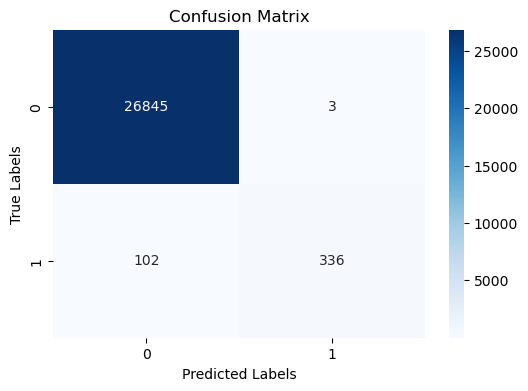






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.767123,0.99115,0.864865,0.935876


In [32]:
results = pd.DataFrame()
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_train_test_split(data)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)  
y_score = get_probability(logreg, X_test)
results = results.append(result(y_test,y_pred,y_score,'LogisticRegression'))
results

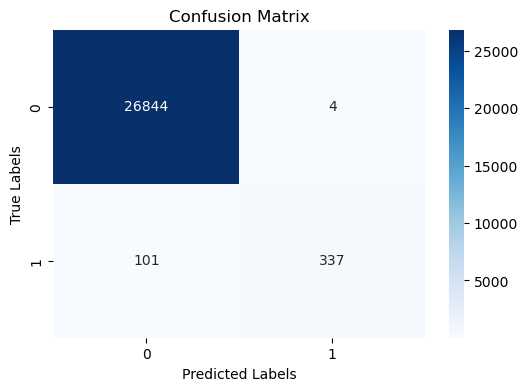






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.767123,0.99115,0.864865,0.935876
XGBClassifier_result,0.769406,0.98827,0.865212,0.960723


In [33]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, max_depth=2)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test) 

y_score = get_probability(model, X_test)
results = results.append(result(y_test,y_pred,y_score,'XGBClassifier'))
results

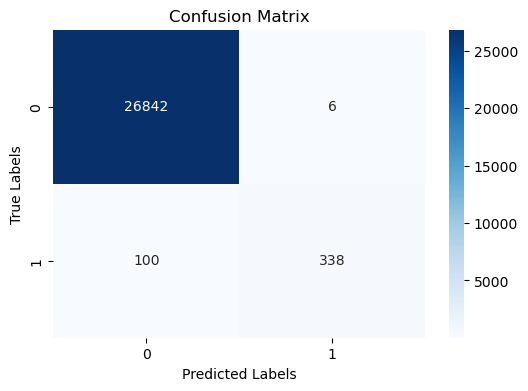






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.767123,0.991150,0.864865,0.935876
XGBClassifier_result,0.769406,0.988270,0.865212,0.960723
CatBoostClassifier_result,0.771689,0.982558,0.864450,0.959671


In [34]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(silent=True)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test) 

y_score = get_probability(cat_model, X_test)
results = results.append(result(y_test,y_pred,y_score,'CatBoostClassifier'))
results

# Train with Oversampled data

In [35]:
from imblearn.over_sampling import RandomOverSampler
def over_sample(X_train,y_train):
    ros = RandomOverSampler(random_state=42)
    X_ros, y_ros = ros.fit_resample(X_train, y_train)
    return X_ros, y_ros

In [36]:
X_train, X_test, y_train, y_test = get_train_test_split(data)
X,Y = over_sample(X_train, y_train)

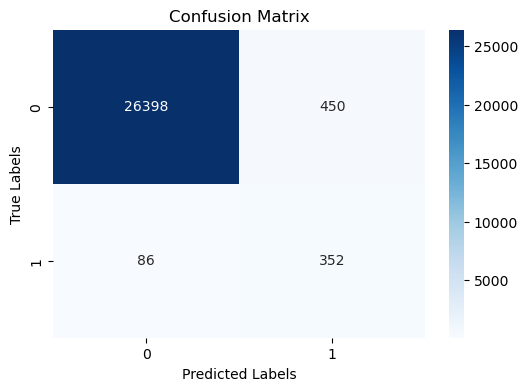






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.803653,0.438903,0.567742,0.938346


In [37]:
from sklearn.linear_model import LogisticRegression
oversampling_results = pd.DataFrame()
logreg = LogisticRegression()
logreg.fit(X,Y)
y_pred = logreg.predict(X_test)    
y_score = get_probability(logreg, X_test)
oversampling_results = oversampling_results.append(result(y_test,y_pred,y_score,'LogisticRegression'))
oversampling_results

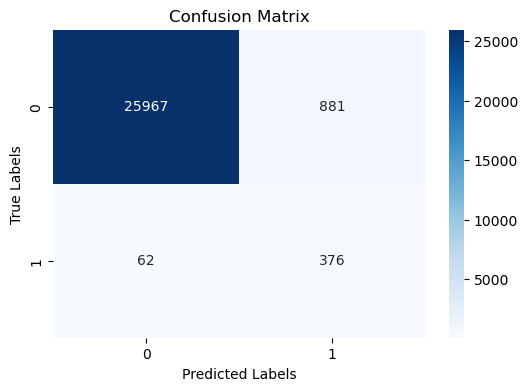






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.803653,0.438903,0.567742,0.938346
XGBClassifier_result,0.858447,0.299125,0.443658,0.959147


In [38]:
model = XGBClassifier(n_estimators=100, max_depth=2)
model.fit(X, Y)
y_pred = model.predict(X_test)    
y_score = get_probability(model, X_test)
oversampling_results = oversampling_results.append(result(y_test,y_pred,y_score,'XGBClassifier'))
oversampling_results

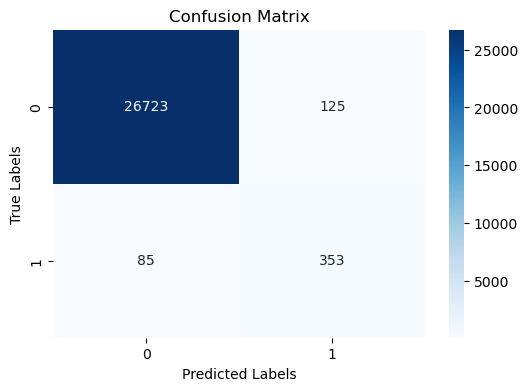






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.803653,0.438903,0.567742,0.938346
XGBClassifier_result,0.858447,0.299125,0.443658,0.959147
CatBoostClassifier_result,0.805936,0.738494,0.770742,0.957737


In [39]:
cat_model = CatBoostClassifier(silent=True)
cat_model.fit(X, Y)
y_pred = cat_model.predict(X_test)    
y_score = get_probability(cat_model, X_test)
oversampling_results = oversampling_results.append(result(y_test,y_pred,y_score,'CatBoostClassifier'))
oversampling_results

# Lets compare the model results with and without oversampling 

In [40]:
compare_results = pd.DataFrame()
compare_results['F1-Score without_oversampling'] = results['f1-score']
compare_results['F1-Score with_oversampling'] = oversampling_results['f1-score']
compare_results

,F1-Score without_oversampling,F1-Score with_oversampling
LogisticRegression_result,0.864865,0.567742
XGBClassifier_result,0.865212,0.443658
CatBoostClassifier_result,0.864450,0.770742


In [41]:
compare_results = pd.DataFrame()
compare_results['roc_auc without_oversampling'] = results['roc_auc']
compare_results['roc_auc with_oversampling'] = oversampling_results['roc_auc']
compare_results

,roc_auc without_oversampling,roc_auc with_oversampling
LogisticRegression_result,0.935876,0.938346
XGBClassifier_result,0.960723,0.959147
CatBoostClassifier_result,0.959671,0.957737


Text(0.5, 1.0, 'F1-Score comparision with and without oversampling')

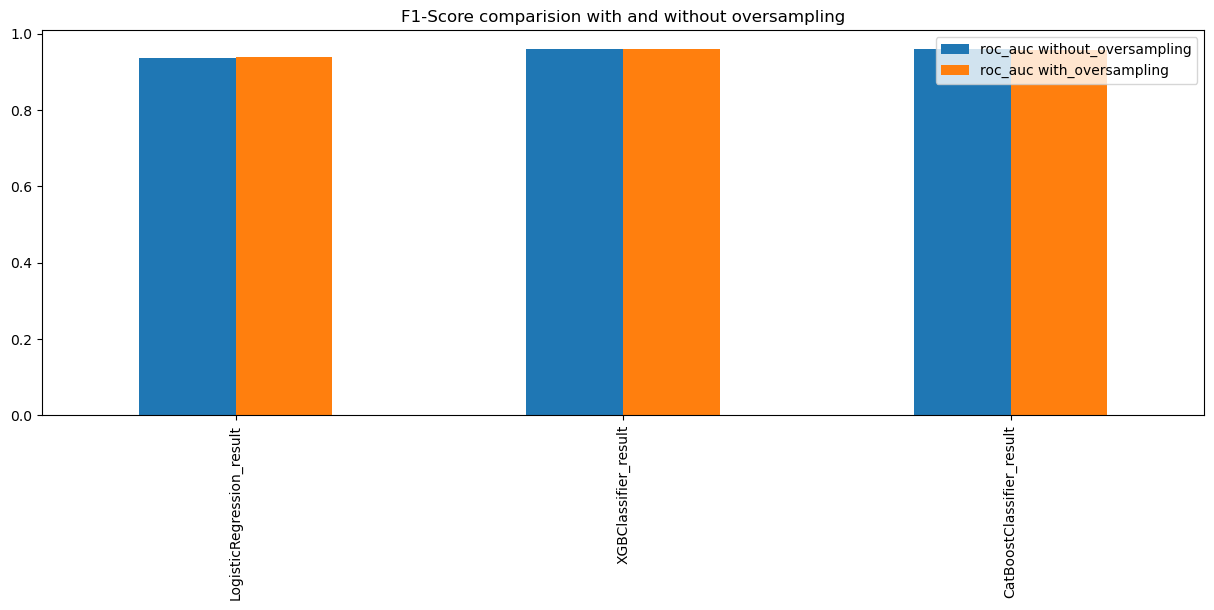

In [42]:
_,ax = plt.subplots(figsize=(15,5))
compare_results.plot(kind='bar', ax=ax)
plt.title('F1-Score comparision with and without oversampling')

# Notice F1_score in above plot, after oversampling performence has become poor

# Model building with engineered columns

In [43]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
X_train, X_test, y_train, y_test = get_train_test_split(data, product_needed_flag=True)
X_train = clean_data(X_train, train_flag=True)
X_test = clean_data(X_test)
X_train = get_data_frame_with_engineered_column(X_train)
X_train.head(2)

,Type,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,...,MIN Process temperature,MIN Rotational speed,MIN Torque,MIN Tool wear,MAX Air temperature,MAX Process temperature,MAX Rotational speed,MAX Torque,MAX Tool wear,failure_ratio
0,1,0.0,0.0,0.0,0.0,0.0,0.681319,0.6125,0.175953,0.546832,...,0.5750,0.075073,0.365385,0.0,0.703297,0.6375,0.287390,0.681319,0.470356,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.593407,0.4625,0.158944,0.542700,...,0.4625,0.135484,0.447802,0.0,0.604396,0.4875,0.211144,0.620879,0.612648,0.0


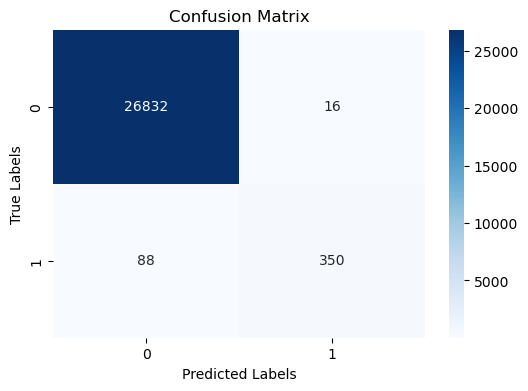






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.799087,0.956284,0.870647,0.986904


In [44]:
from sklearn.linear_model import LogisticRegression
feature_engineering_results = pd.DataFrame()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(get_data_frame_with_engineered_column(X_test))

y_score = get_probability(logreg, get_data_frame_with_engineered_column(X_test))
feature_engineering_results = feature_engineering_results.append(result(y_test,y_pred,y_score,'LogisticRegression'))
feature_engineering_results

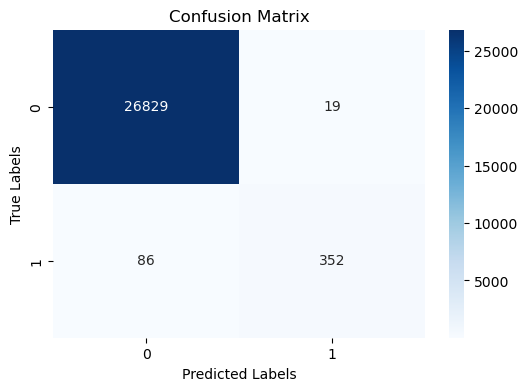






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.799087,0.956284,0.870647,0.986904
XGBClassifier_result,0.803653,0.948787,0.870210,0.994908


In [45]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(get_data_frame_with_engineered_column(X_test))  

y_score = get_probability(model, get_data_frame_with_engineered_column(X_test))
feature_engineering_results = feature_engineering_results.append(result(y_test,y_pred,y_score,'XGBClassifier'))
feature_engineering_results

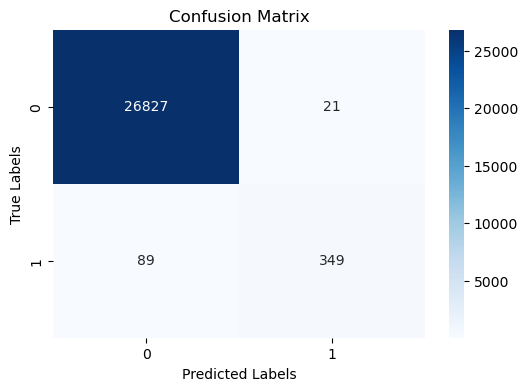






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.799087,0.956284,0.870647,0.986904
XGBClassifier_result,0.803653,0.948787,0.870210,0.994908
CatBoostClassifier_result,0.796804,0.943243,0.863861,0.994980


In [46]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(silent=True)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(get_data_frame_with_engineered_column(X_test))    

y_score = get_probability(cat_model, get_data_frame_with_engineered_column(X_test))
feature_engineering_results = feature_engineering_results.append(result(y_test,y_pred,y_score,'CatBoostClassifier'))
feature_engineering_results

# Lets verify the performence with and without engineered columns

In [47]:
compare_results = pd.DataFrame()
compare_results['F1-Score without_engineered_column'] = results['f1-score']
compare_results['F1-Score with_engineered_column'] = feature_engineering_results['f1-score']
compare_results

,F1-Score without_engineered_column,F1-Score with_engineered_column
LogisticRegression_result,0.864865,0.870647
XGBClassifier_result,0.865212,0.870210
CatBoostClassifier_result,0.864450,0.863861


In [48]:
compare_results = pd.DataFrame()
compare_results['roc_auc without_engineered_column'] = results['roc_auc']
compare_results['roc_auc with_engineered_column'] = feature_engineering_results['roc_auc']
compare_results

,roc_auc without_engineered_column,roc_auc with_engineered_column
LogisticRegression_result,0.935876,0.986904
XGBClassifier_result,0.960723,0.994908
CatBoostClassifier_result,0.959671,0.994980


In [ ]:
_,ax = plt.subplots(figsize=(15,5))
compare_results.plot(kind='bar', ax=ax)
plt.title('ROC-AUC comparision with and without engineered_column')

# ROC AUC and F1-Score for all models have improved with engineered features

# Hyper parameter tunning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
X_train, X_test, y_train, y_test = get_train_test_split(data, product_needed_flag=True)
X_train = clean_data(X_train, train_flag=True)
X_test = clean_data(X_test)
X_train = get_data_frame_with_engineered_column(X_train)
X_train.head(2)

,Type,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,...,MIN Process temperature,MIN Rotational speed,MIN Torque,MIN Tool wear,MAX Air temperature,MAX Process temperature,MAX Rotational speed,MAX Torque,MAX Tool wear,failure_ratio
0,1,0.0,0.0,0.0,0.0,0.0,0.681319,0.6125,0.175953,0.546832,...,0.5750,0.075073,0.365385,0.0,0.703297,0.6375,0.287390,0.681319,0.470356,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.593407,0.4625,0.158944,0.542700,...,0.4625,0.135484,0.447802,0.0,0.604396,0.4875,0.211144,0.620879,0.612648,0.0


In [62]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength (smaller values for stronger regularization)
    'penalty': ['l1', 'l2'],       # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear'],       
    'max_iter': [100, 200, 300]    
}

logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


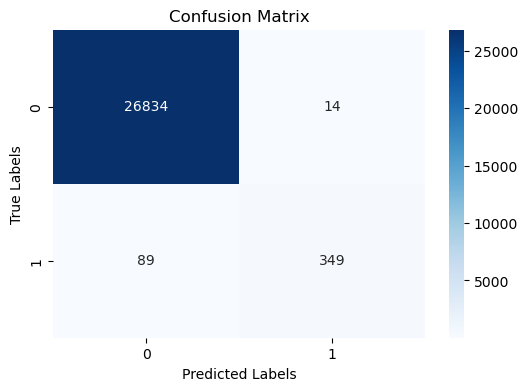






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.796804,0.961433,0.871411,0.987338


In [69]:
best_params = {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
parameter_tunning_results = pd.DataFrame()
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(get_data_frame_with_engineered_column(X_test))  

y_score = get_probability(model, get_data_frame_with_engineered_column(X_test))
parameter_tunning_results = parameter_tunning_results.append(result(y_test,y_pred,y_score,'LogisticRegression'))
parameter_tunning_results

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
params = {
    'max_depth': [5, 7,10],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [150,200,350]
}
xgb = XGBClassifier(n_estimators=100)
grid_search = GridSearchCV(xgb, param_grid=params, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)  
print(grid_search.best_params_)

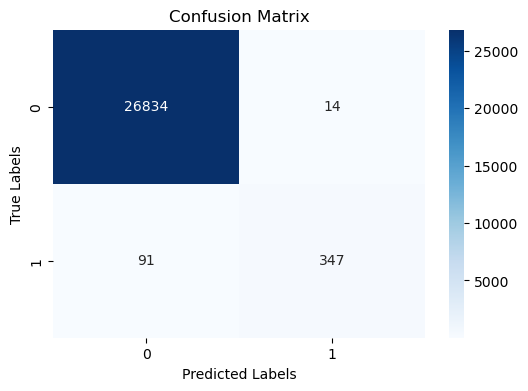






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.796804,0.961433,0.871411,0.987338
XGBClassifier_result,0.792237,0.961219,0.868586,0.995636


In [70]:
best_params = {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(get_data_frame_with_engineered_column(X_test))  

y_score = get_probability(model, get_data_frame_with_engineered_column(X_test))
parameter_tunning_results = parameter_tunning_results.append(result(y_test,y_pred,y_score,'XGBClassifier'))
parameter_tunning_results

In [ ]:
catboost_model = CatBoostClassifier(silent=True)
param_grid = {
    'learning_rate': [0.01, 0.1],   
    'depth': [5, 7, 9],                   
    'l2_leaf_reg': [1, 3, 5]              # L2 regularization term for leaf weights
}
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", grid_search.best_params_)

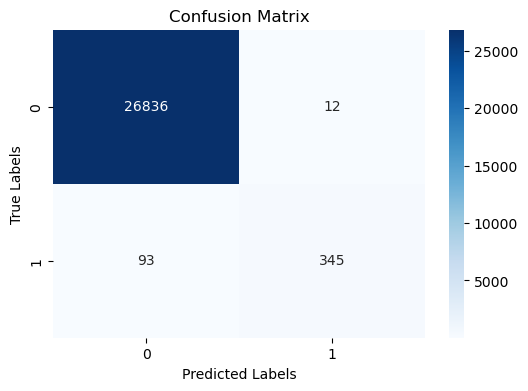






**************************************************


,recall,precision,f1-score,roc_auc
LogisticRegression_result,0.796804,0.961433,0.871411,0.987338
XGBClassifier_result,0.792237,0.961219,0.868586,0.995636
CatBoostClassifier_result,0.787671,0.966387,0.867925,0.995596


In [71]:
best_params = {'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
model = CatBoostClassifier(**best_params, silent=True)
model.fit(X_train, y_train)
y_pred = model.predict(get_data_frame_with_engineered_column(X_test))  

y_score = get_probability(model, get_data_frame_with_engineered_column(X_test))
parameter_tunning_results = parameter_tunning_results.append(result(y_test,y_pred,y_score,'CatBoostClassifier'))
parameter_tunning_results

In [72]:
compare_results = pd.DataFrame()
compare_results['F1-Score without_parameter_tunning'] = results['f1-score']
compare_results['F1-Score with_parameter_tunning'] = parameter_tunning_results['f1-score']
compare_results

,F1-Score without_parameter_tunning,F1-Score with_parameter_tunning
LogisticRegression_result,0.864865,0.871411
XGBClassifier_result,0.865212,0.868586
CatBoostClassifier_result,0.864450,0.867925


In [73]:
compare_results = pd.DataFrame()
compare_results['roc_auc without_parameter_tunning'] = feature_engineering_results['roc_auc']
compare_results['roc_auc with_parameter_tunning'] = parameter_tunning_results['roc_auc']
compare_results

,roc_auc without_parameter_tunning,roc_auc with_parameter_tunning
LogisticRegression_result,0.986904,0.987338
XGBClassifier_result,0.994908,0.995636
CatBoostClassifier_result,0.994980,0.995596


# both F1-Score and ROC_AUC of each model have further improved after parameter tunning

# As per AOC_AUC, top 2 best models are catboost, and XGboost.

# Now lets make Final Prediction, but before that train the model again on whole data

In [74]:
data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
X_train = data.drop(['Machine failure'], axis=1)
y_train = data['Machine failure']
X_train = clean_data(X_train, train_flag=True)
X_train = get_data_frame_with_engineered_column(X_train)
X_train = X_train.drop(['id'], axis=1)
print(X_train.shape)
X_train.head(2)

(136429, 27)


,Type,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,...,MIN Process temperature,MIN Rotational speed,MIN Torque,MIN Tool wear,MAX Air temperature,MAX Process temperature,MAX Rotational speed,MAX Torque,MAX Tool wear,failure_ratio
0,1,0.0,0.0,0.0,0.0,0.0,0.582418,0.4750,0.243402,0.443681,...,0.425,0.102639,0.333791,0.193676,0.593407,0.475,0.346041,0.637363,0.873518,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.802198,0.7875,0.339003,0.347527,...,0.775,0.042815,0.247253,0.000000,0.989011,0.975,0.480352,0.697802,0.790514,0.0


In [75]:
best_params = {'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
model = CatBoostClassifier(**best_params, silent=True)
model.fit(X_train, y_train)

In [76]:
best_params = {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
xg_model = XGBClassifier(**best_params)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Preprocess test data

In [77]:
test = pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")
print(test.shape)
test.head(2)

(90954, 13)


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0


In [78]:
test = clean_data(test)
test = get_data_frame_with_engineered_column(test)
ids = test['id']
test = test.drop(['id'], axis=1)
print(test.shape)
test.head(2)

(90954, 27)


,Type,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,...,MIN Process temperature,MIN Rotational speed,MIN Torque,MIN Tool wear,MAX Air temperature,MAX Process temperature,MAX Rotational speed,MAX Torque,MAX Tool wear,failure_ratio
0,1,0.0,0.0,0.0,0.0,0.0,0.769231,0.7125,0.186510,0.469780,...,0.6125,0.115543,0.335165,0.007905,0.769231,0.7125,0.333138,0.625000,0.750988,0.000000
1,1,0.0,0.0,0.0,0.0,0.0,0.703297,0.6500,0.312023,0.343407,...,0.5750,0.080352,0.247253,0.000000,0.703297,0.6500,0.371848,0.674451,0.758893,0.021277


In [79]:
y_score_cb = model.predict_proba(test)
y_score_xg = xg_model.predict_proba(test)

In [80]:
y_pred_cb = np.array(list(map(lambda x: x[1] ,y_score_cb)))
y_score_xg = np.array(list(map(lambda x: x[1] ,y_score_xg)))

In [82]:
pd.DataFrame(zip(ids,y_pred_cb),columns=['id','Machine failure']).to_csv("submission.csv", index=False)